In [45]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
import warnings

from prophet import Prophet
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import numpy as np

warnings.filterwarnings('ignore')

In [10]:
imports = pd.read_csv('data/cleanData/IMPORTACION.csv')
imports

,Fecha,GasLicuado,Regular,Superior,Diesel
0,01/2001,194065.74,177776.50,373963.96,566101.99
1,02/2001,170703.38,123115.99,243091.07,489525.80
2,03/2001,161837.37,161726.42,312084.38,575559.68
3,04/2001,163048.64,127338.74,285054.89,437745.42
4,05/2001,171518.86,168730.19,300913.67,552609.13
...,...,...,...,...,...
276,01/2024,701570.80,914133.32,712333.33,1415808.13
277,02/2024,916541.70,740662.25,650360.11,1241501.08
278,03/2024,675157.48,838270.93,620077.74,1482045.48
279,04/2024,473940.66,886132.77,687017.96,1294706.12


In [11]:
consume = pd.read_csv('data/cleanData/CONSUMO.csv')
consume

,Fecha,GasLicuado,Regular,Superior,Diesel
0,01/2000,194410.48,202645.20,308156.82,634667.06
1,02/2000,174710.55,205530.96,307766.31,642380.66
2,03/2000,189234.07,229499.56,331910.29,699807.25
3,04/2000,174330.61,210680.40,315648.08,586803.98
4,05/2000,191745.15,208164.34,319667.97,656948.20
...,...,...,...,...,...
288,01/2024,548124.45,830708.13,658083.66,1371766.15
289,02/2024,526897.85,818740.16,654059.60,1352602.93
290,03/2024,523990.91,870771.70,671997.05,1405703.42
291,04/2024,531880.19,847353.15,633520.57,1442103.60


In [12]:
prices = pd.read_csv('data/cleanData/PRECIOS.csv')
prices

,Fecha,Superior,Regular,Diesel,GasLicuado
0,01/2021,21.91,21.11,17.61,99.0
1,01/2021,21.91,21.11,17.61,99.0
2,01/2021,21.91,21.11,17.61,99.0
3,01/2021,21.91,21.11,17.61,99.0
4,01/2021,21.91,21.11,17.61,99.0
...,...,...,...,...,...
1304,07/2024,32.79,31.29,28.09,110.0
1305,07/2024,32.63,31.13,27.93,110.0
1306,07/2024,32.63,31.13,27.93,110.0
1307,07/2024,32.63,31.13,27.93,110.0


## Consumo de gasolina super, gasolina regular, diésel y gas licuado 

In [13]:
print("Start date: ", imports.Fecha.min())
print("Finish date: ", imports.Fecha.max())

Start date:  01/2001
Finish date:  12/2023


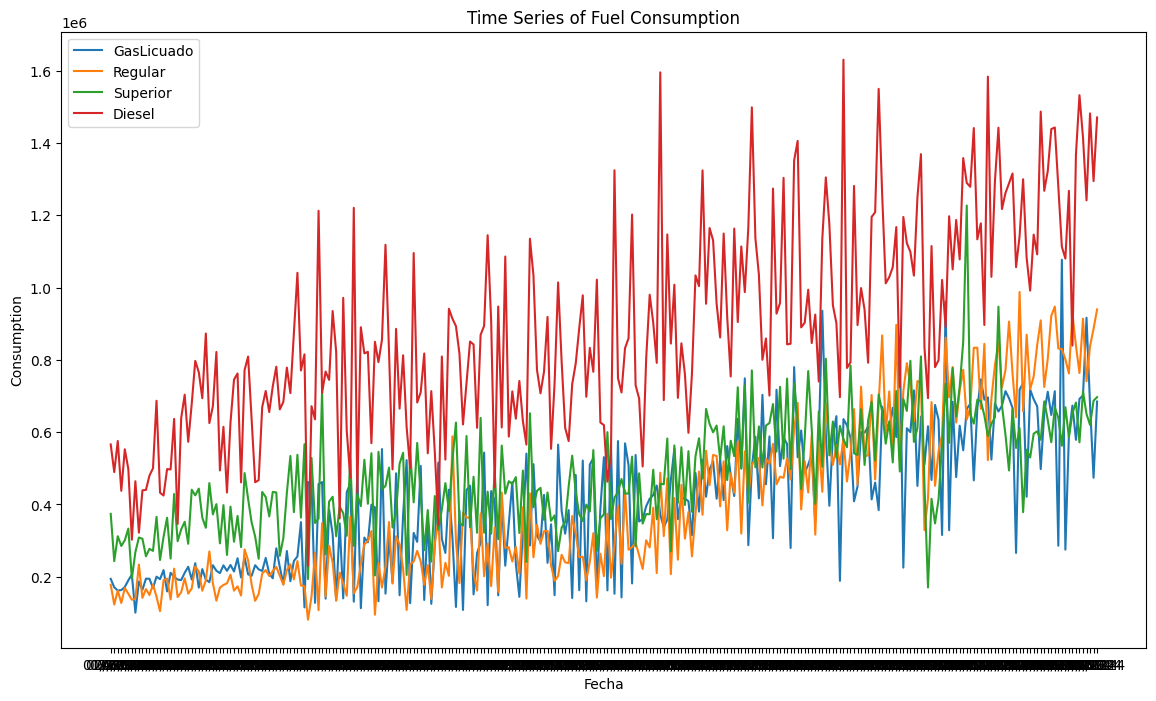

In [14]:
# Plotting each column
plt.figure(figsize=(14, 8))

# Plot GasLicuado
plt.plot(imports['Fecha'], imports['GasLicuado'], label='GasLicuado')

# Plot Regular
plt.plot(imports['Fecha'], imports['Regular'], label='Regular')

# Plot Superior
plt.plot(imports['Fecha'], imports['Superior'], label='Superior')

# Plot Diesel
plt.plot(imports['Fecha'], imports['Diesel'], label='Diesel')

# Adding title and labels
plt.title('Time Series of Fuel Consumption')
plt.xlabel('Fecha')
plt.ylabel('Consumption')
plt.legend()

# Display the plot
plt.show()

## Plot Autocorrelation

<Figure size 1000x600 with 0 Axes>

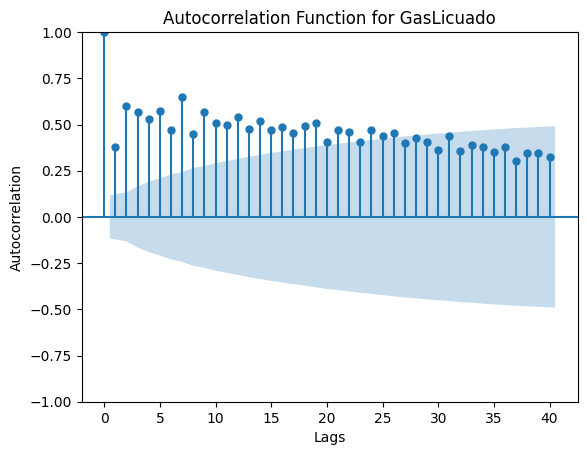

<Figure size 1000x600 with 0 Axes>

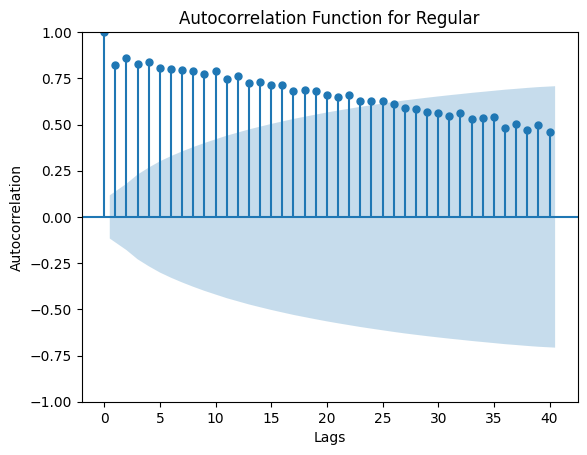

<Figure size 1000x600 with 0 Axes>

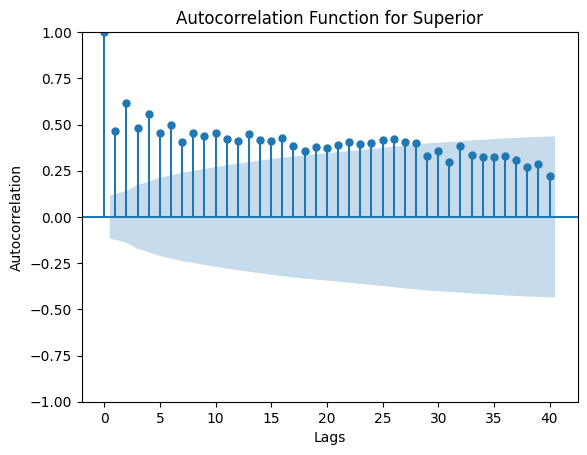

<Figure size 1000x600 with 0 Axes>

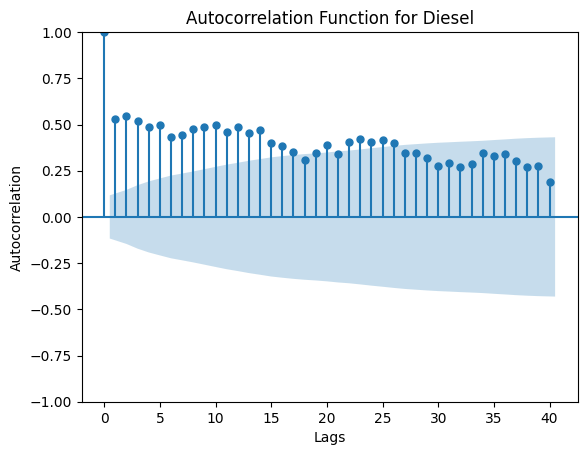

In [15]:
# Plot the autocorrelation function for 'GasLicuado'
plt.figure(figsize=(10, 6))
plot_acf(imports['GasLicuado'].dropna(), lags=40)
plt.title('Autocorrelation Function for GasLicuado')
plt.xlabel('Lags')
plt.ylabel('Autocorrelation')
plt.show()

# Plot the autocorrelation function for 'Regular'
plt.figure(figsize=(10, 6))
plot_acf(imports['Regular'].dropna(), lags=40)
plt.title('Autocorrelation Function for Regular')
plt.xlabel('Lags')
plt.ylabel('Autocorrelation')
plt.show()

# Plot the autocorrelation function for 'Superior'
plt.figure(figsize=(10, 6))
plot_acf(imports['Superior'].dropna(), lags=40)
plt.title('Autocorrelation Function for Superior')
plt.xlabel('Lags')
plt.ylabel('Autocorrelation')
plt.show()

# Plot the autocorrelation function for 'Diesel'
plt.figure(figsize=(10, 6))
plot_acf(imports['Diesel'].dropna(), lags=40)
plt.title('Autocorrelation Function for Diesel')
plt.xlabel('Lags')
plt.ylabel('Autocorrelation')
plt.show()

## Time Series Decomposition

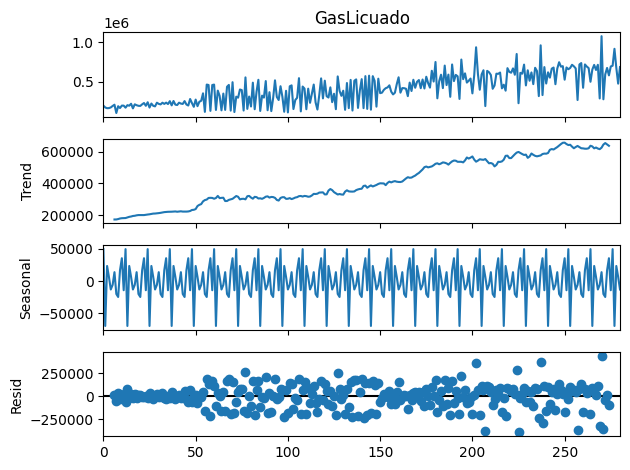

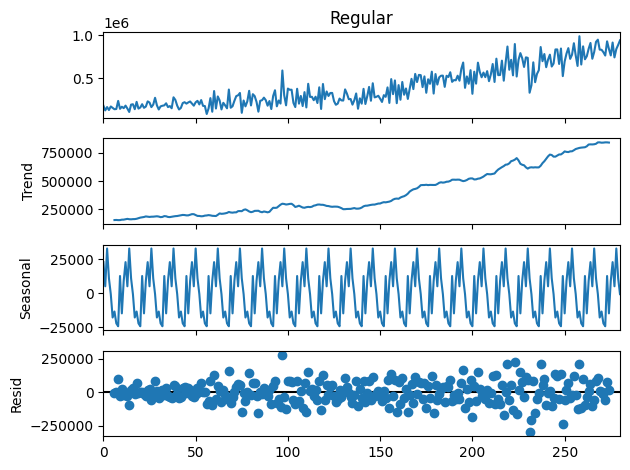

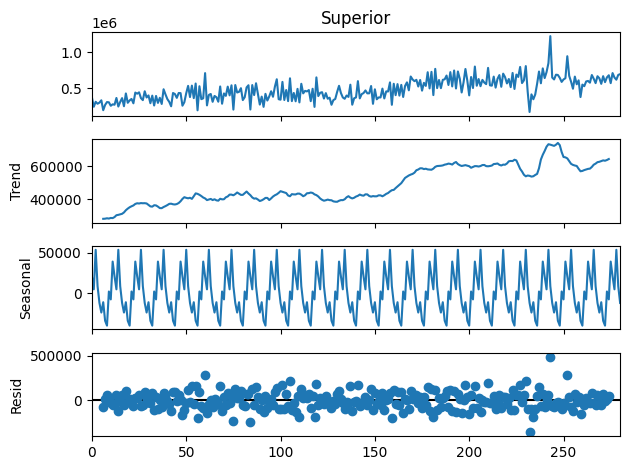

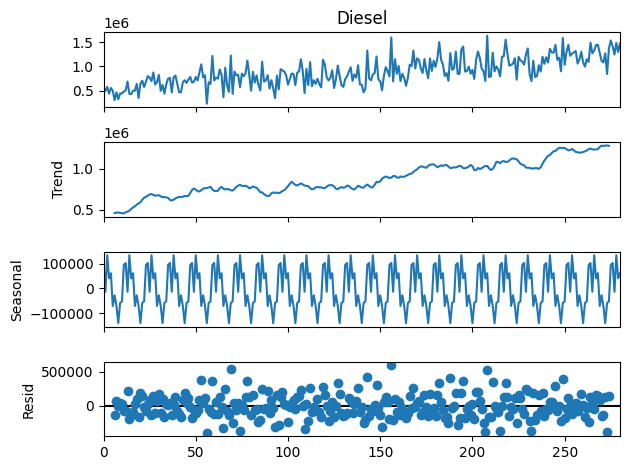

In [16]:
# Decompose the time series for one of the column 'GasLicuado'
result = seasonal_decompose(imports['GasLicuado'], model='additive', period=12)
result_regular = seasonal_decompose(imports['Regular'], model='additive', period=12)
result_super = seasonal_decompose(imports['Superior'], model='additive', period=12)
result_diesel = seasonal_decompose(imports['Diesel'], model='additive', period=12)

# Plot the decomposed components
result.plot()
result_regular.plot()
result_super.plot()
result_diesel.plot()
plt.show()

### ADF Test

In [17]:
result = adfuller(imports['GasLicuado'])
print('ADF Statistic Gas Licuado:', result[0])
print('p-value:', result[1])
for key, value in result[4].items():
    print('Critical Value (%s): %.3f' % (key, value))
print()

result = adfuller(imports['Regular'])
print('ADF Statistic Regular:', result[0])
print('p-value:', result[1])
for key, value in result[4].items():
    print('Critical Value (%s): %.3f' % (key, value))
print()

result = adfuller(imports['Superior'])
print('ADF Statistic Superior:', result[0])
print('p-value:', result[1])
for key, value in result[4].items():
    print('Critical Value (%s): %.3f' % (key, value))
print()

result = adfuller(imports['Diesel'])
print('ADF Statistic Diesel:', result[0])
print('p-value:', result[1])
for key, value in result[4].items():
    print('Critical Value (%s): %.3f' % (key, value))
print()


ADF Statistic Gas Licuado: -0.40230604536398595
p-value: 0.9097130377765302
Critical Value (1%): -3.455
Critical Value (5%): -2.872
Critical Value (10%): -2.573

ADF Statistic Regular: 0.8288289941706345
p-value: 0.9920875541311317
Critical Value (1%): -3.455
Critical Value (5%): -2.872
Critical Value (10%): -2.572

ADF Statistic Superior: -2.932952845212409
p-value: 0.0416480373437015
Critical Value (1%): -3.454
Critical Value (5%): -2.872
Critical Value (10%): -2.572

ADF Statistic Diesel: -0.8143723801512286
p-value: 0.8148637918979726
Critical Value (1%): -3.455
Critical Value (5%): -2.872
Critical Value (10%): -2.573



Since the p-value for Gas Licuado, Superior, and Diesel is greater than 0.05 this suggests that the null hypothesis (which states that the time series has a unit root and is non-stationary) cannot be rejected. This means the time series is **likely non-stationary** by mean.  Besides, all those three have a strong growing linear trend can be observed both after ploting the  data and the trend on the decomposed series. The Superior gas time series, even though we can't reject the null hypothesis we can observe a slight trend and a slow decay on the Autocorrelation plot, which likely indicates is also **non-stationary** by mean. Therefore we will transform using differenciation.

## Differentiating the time series

### Gas Licuado

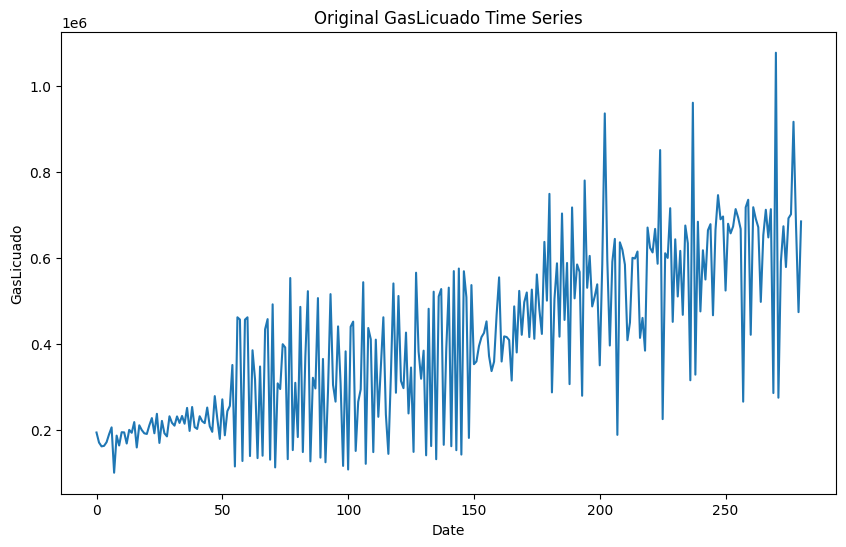

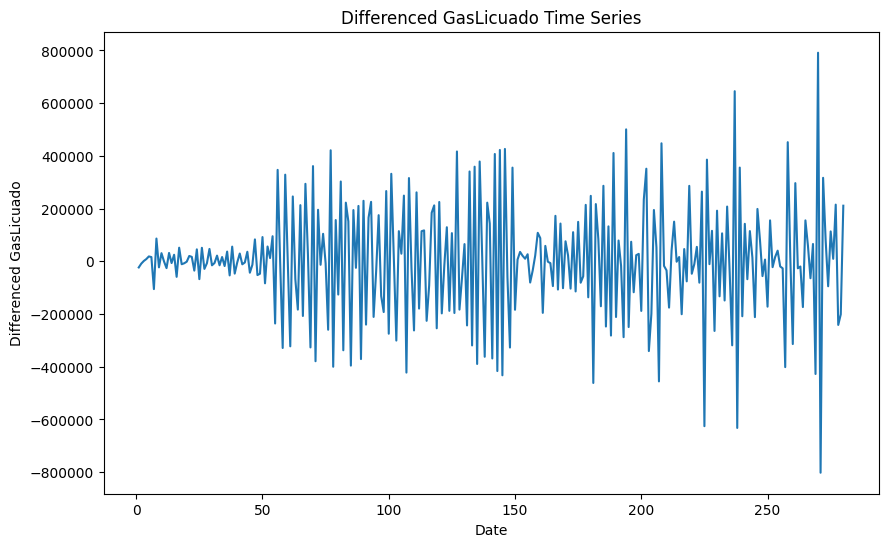

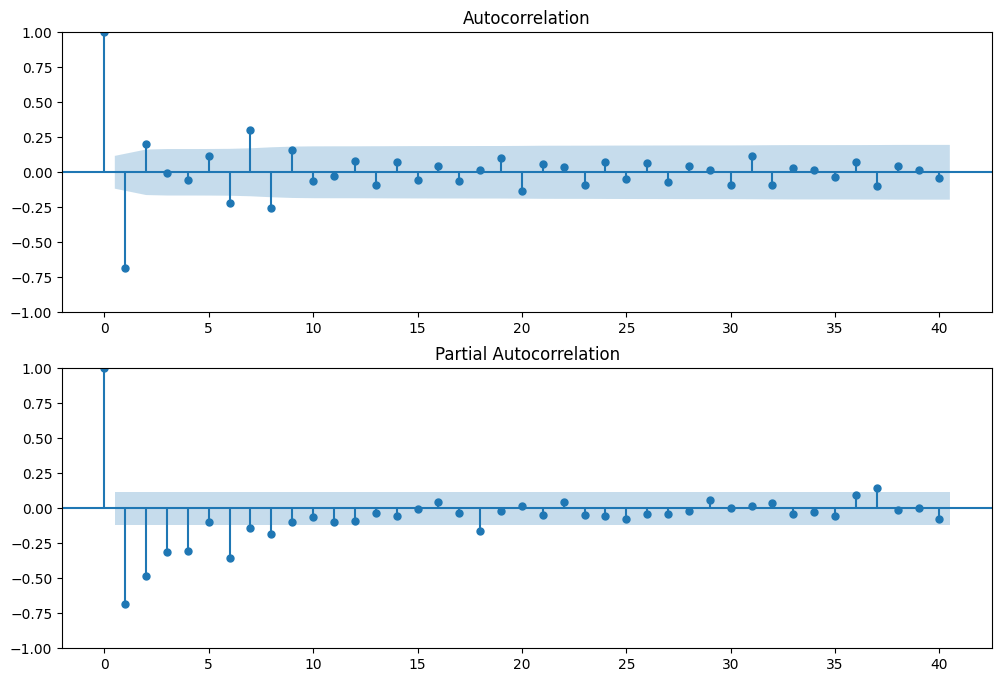

ADF Statistic Gas Licuado: -8.476967279241121
p-value: 1.426760217869546e-13
Critical Value (1%): -3.455
Critical Value (5%): -2.872
Critical Value (10%): -2.573



In [18]:
# Plot the original time series
plt.figure(figsize=(10, 6))
plt.plot(imports.index, imports['GasLicuado'])
plt.title('Original GasLicuado Time Series')
plt.xlabel('Date')
plt.ylabel('GasLicuado')
plt.show()

# Apply differencing to remove the trend
imports['GasLicuado_diff'] = imports['GasLicuado'].diff().dropna()

# Plot the differenced time series
plt.figure(figsize=(10, 6))
plt.plot(imports.index, imports['GasLicuado_diff'])
plt.title('Differenced GasLicuado Time Series')
plt.xlabel('Date')
plt.ylabel('Differenced GasLicuado')
plt.show()

# Plot ACF and PACF to identify p and q
fig, ax = plt.subplots(2, 1, figsize=(12, 8))
plot_acf(imports['GasLicuado_diff'].dropna(), lags=40, ax=ax[0])
plot_pacf(imports['GasLicuado_diff'].dropna(), lags=40, ax=ax[1])
plt.show()

# We do the AFD test again to determine the d parameter
result = adfuller(imports['GasLicuado_diff'].dropna())
print('ADF Statistic Gas Licuado:', result[0])
print('p-value:', result[1])
for key, value in result[4].items():
    print('Critical Value (%s): %.3f' % (key, value))
print()

We choose 3 as q since it's where the autocorrelation drops off to zero.  
We chose 5 as p since it's where the partial autocorrelation drops off to zero.
We chose d as 1

### Regular

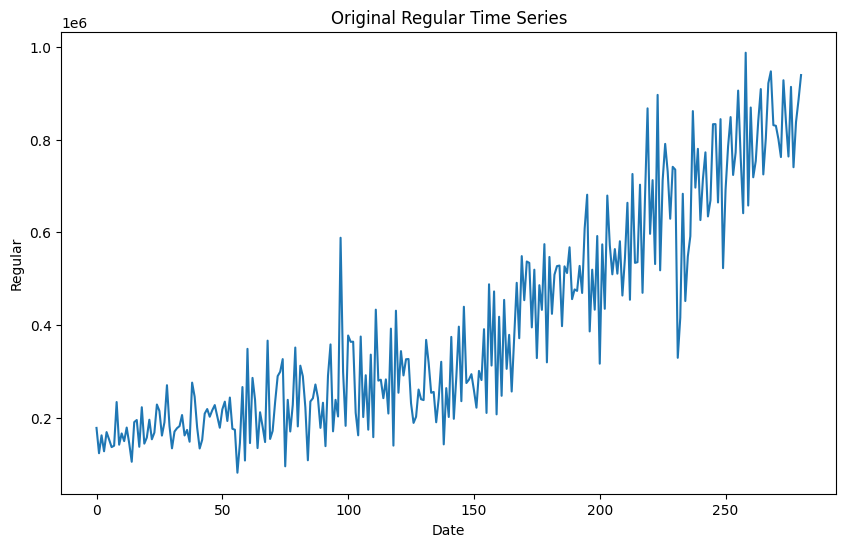

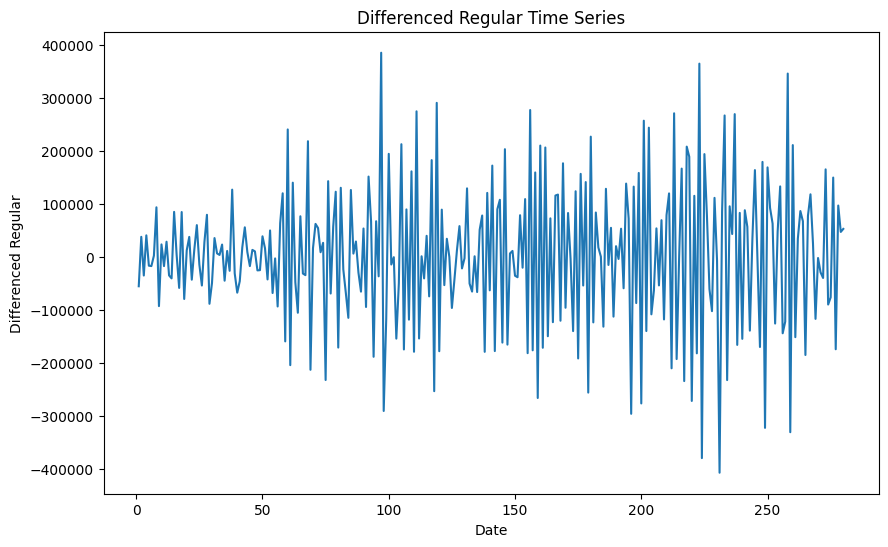

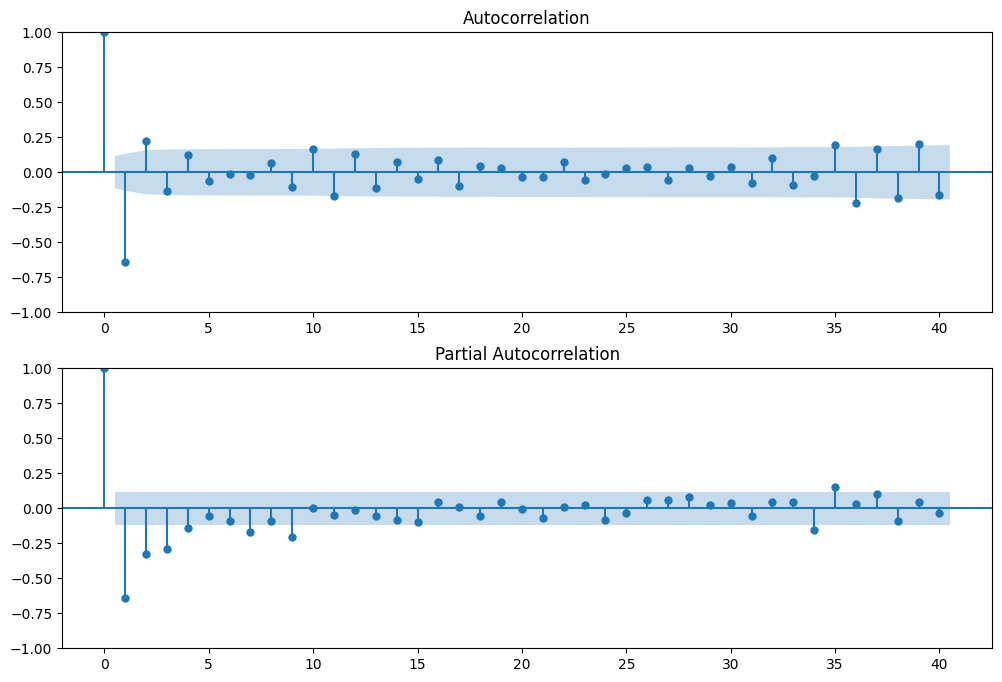

ADF Statistic Regular_diff: -10.111097640708568
p-value: 9.998584764027139e-18
Critical Value (1%): -3.455
Critical Value (5%): -2.872
Critical Value (10%): -2.572



In [19]:
# Plot the original time series
plt.figure(figsize=(10, 6))
plt.plot(imports.index, imports['Regular'])
plt.title('Original Regular Time Series')
plt.xlabel('Date')
plt.ylabel('Regular')
plt.show()

# Apply differencing to remove the trend
imports['Regular_diff'] = imports['Regular'].diff().dropna()

# Plot the differenced time series
plt.figure(figsize=(10, 6))
plt.plot(imports.index, imports['Regular_diff'])
plt.title('Differenced Regular Time Series')
plt.xlabel('Date')
plt.ylabel('Differenced Regular')
plt.show()

# Plot ACF and PACF to identify p and q
fig, ax = plt.subplots(2, 1, figsize=(12, 8))
plot_acf(imports['Regular_diff'].dropna(), lags=40, ax=ax[0])
plot_pacf(imports['Regular_diff'].dropna(), lags=40, ax=ax[1])
plt.show()

# We do the AFD test again to determine the d parameter
result = adfuller(imports['Regular_diff'].dropna())
print('ADF Statistic Regular_diff:', result[0])
print('p-value:', result[1])
for key, value in result[4].items():
    print('Critical Value (%s): %.3f' % (key, value))
print()

We choose 5 as q since it's where the autocorrelation drops off to zero.  
We chose 5 as p since it's where the partial autocorrelation drops off to zero.  
We chose d as 1

### Superior

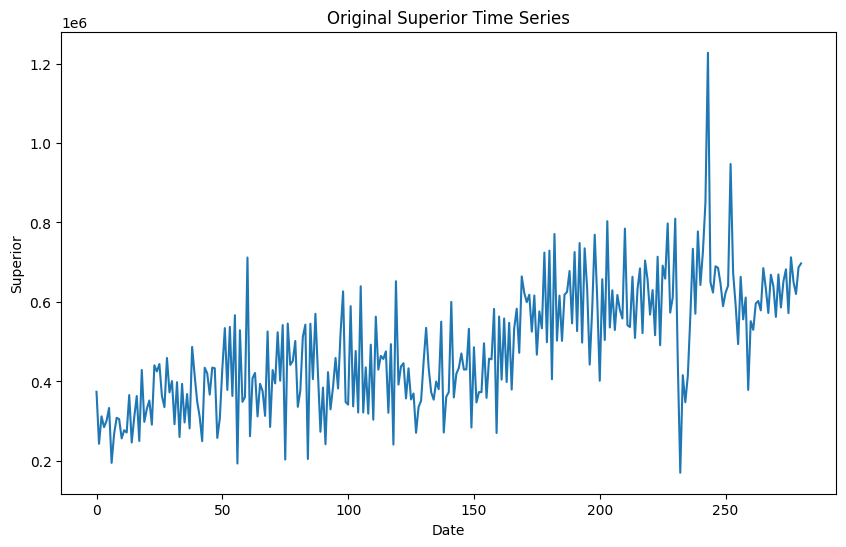

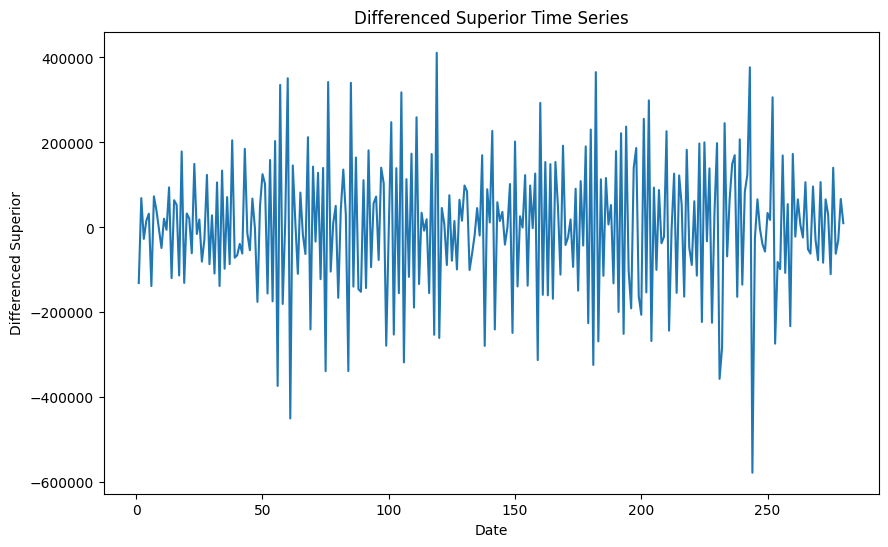

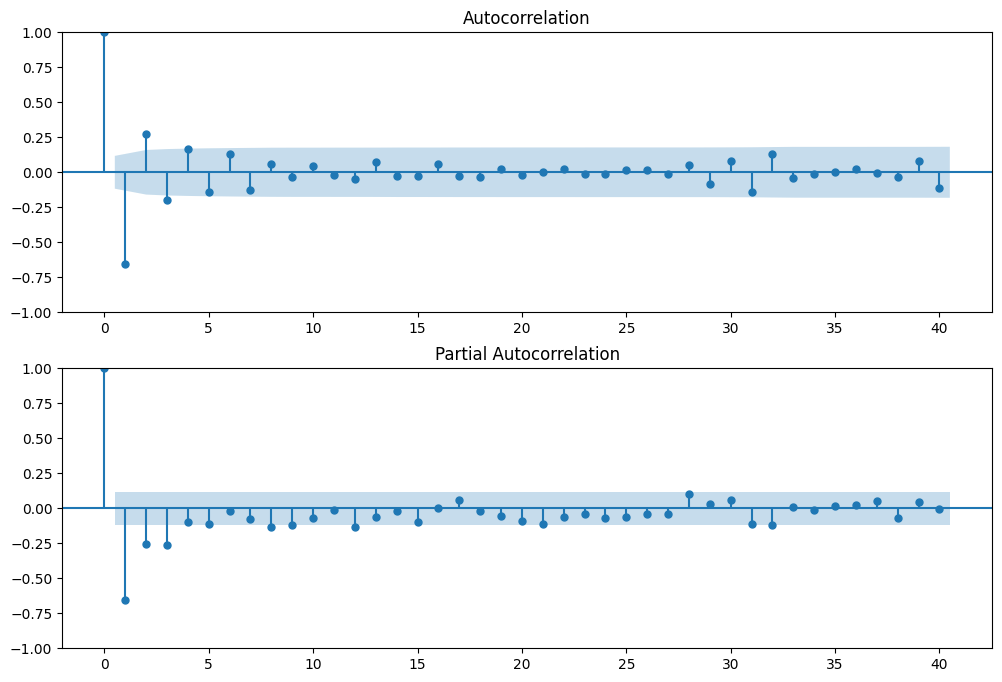

ADF Statistic Superior_diff: -7.7588684107326
p-value: 9.573378220302495e-12
Critical Value (1%): -3.455
Critical Value (5%): -2.872
Critical Value (10%): -2.573



In [20]:
# Plot the original time series
plt.figure(figsize=(10, 6))
plt.plot(imports.index, imports['Superior'])
plt.title('Original Superior Time Series')
plt.xlabel('Date')
plt.ylabel('Superior')
plt.show()

# Apply differencing to remove the trend
imports['Superior_diff'] = imports['Superior'].diff().dropna()

# Plot the differenced time series
plt.figure(figsize=(10, 6))
plt.plot(imports.index, imports['Superior_diff'])
plt.title('Differenced Superior Time Series')
plt.xlabel('Date')
plt.ylabel('Differenced Superior')
plt.show()

# Plot ACF and PACF to identify p and q
fig, ax = plt.subplots(2, 1, figsize=(12, 8))
plot_acf(imports['Superior_diff'].dropna(), lags=40, ax=ax[0])
plot_pacf(imports['Superior_diff'].dropna(), lags=40, ax=ax[1])
plt.show()

# We do the AFD test again to determine the d parameter
result = adfuller(imports['Superior_diff'].dropna())
print('ADF Statistic Superior_diff:', result[0])
print('p-value:', result[1])
for key, value in result[4].items():
    print('Critical Value (%s): %.3f' % (key, value))
print()

We choose 8 as q since it's where the autocorrelation drops off to zero.  
We chose 3 as p since it's where the partial autocorrelation drops off to zero.  
We chose d as 1

### Diesel

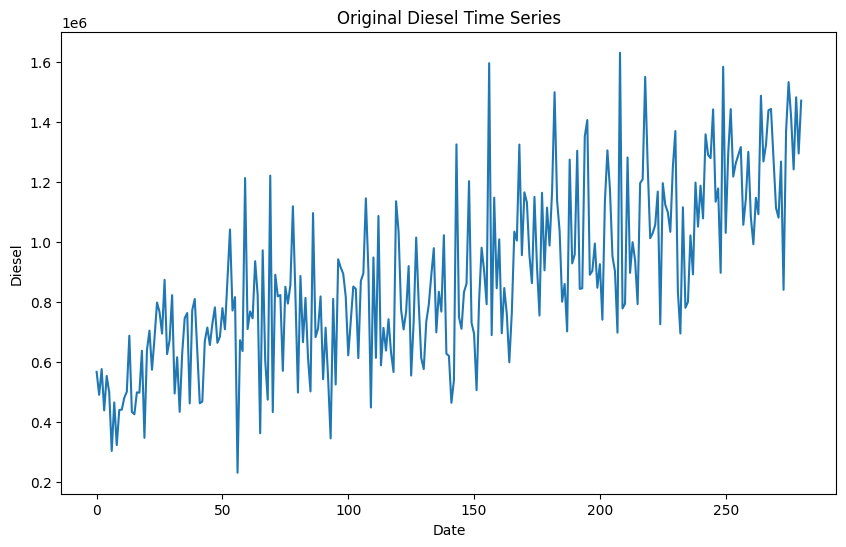

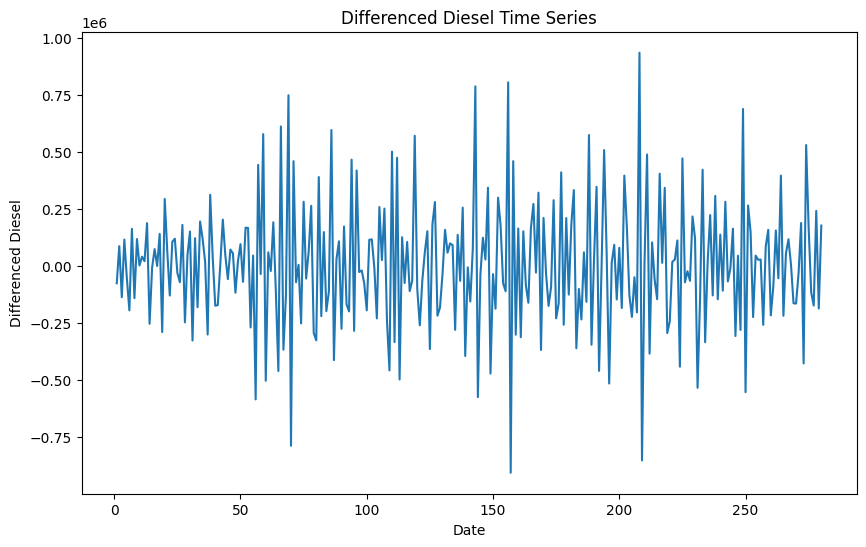

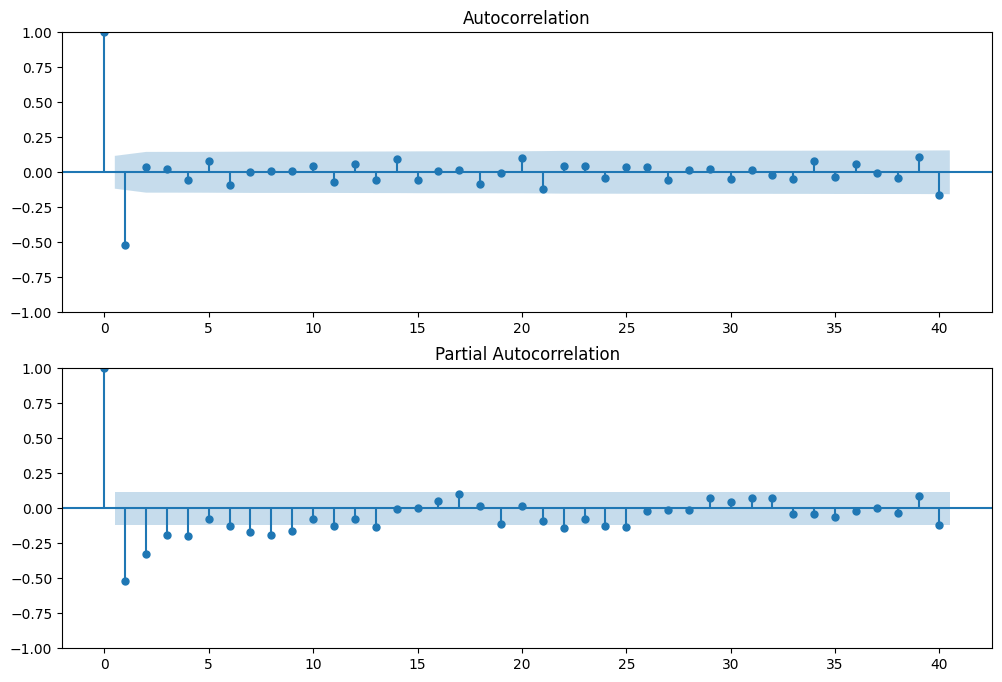

ADF Statistic Diesel_diff: -8.951085510951803
p-value: 8.720099106443884e-15
Critical Value (1%): -3.455
Critical Value (5%): -2.872
Critical Value (10%): -2.573



In [21]:
# Plot the original time series
plt.figure(figsize=(10, 6))
plt.plot(imports.index, imports['Diesel'])
plt.title('Original Diesel Time Series')
plt.xlabel('Date')
plt.ylabel('Diesel')
plt.show()

# Apply differencing to remove the trend
imports['Diesel_diff'] = imports['Diesel'].diff().dropna()

# Plot the differenced time series
plt.figure(figsize=(10, 6))
plt.plot(imports.index, imports['Diesel_diff'])
plt.title('Differenced Diesel Time Series')
plt.xlabel('Date')
plt.ylabel('Differenced Diesel')
plt.show()

# Plot ACF and PACF to identify p and q
fig, ax = plt.subplots(2, 1, figsize=(12, 8))
plot_acf(imports['Diesel_diff'].dropna(), lags=40, ax=ax[0])
plot_pacf(imports['Diesel_diff'].dropna(), lags=40, ax=ax[1])
plt.show()

# We do the AFD test again to determine the d parameter
result = adfuller(imports['Diesel_diff'].dropna())
print('ADF Statistic Diesel_diff:', result[0])
print('p-value:', result[1])
for key, value in result[4].items():
    print('Critical Value (%s): %.3f' % (key, value))
print()

We choose 2 as q since it's where the autocorrelation drops off to zero.  
We chose 5 as p since it's where the partial autocorrelation drops off to zero.  
We chose d as 1

## ARIMA models

### Gas Licuado

In [22]:
# Based on ACF and PACF plots, choose p and q. 
model = ARIMA(imports['GasLicuado'], order=(3, 5, 1))
model_fit = model.fit()

# Print AIC and BIC
print(f'AIC: {model_fit.aic}')
print(f'BIC: {model_fit.bic}')
print()

AIC: 8059.573517914731
BIC: 8077.675522243318



In [23]:
# Based on ACF and PACF plots, choose p and q. 
model = ARIMA(imports['GasLicuado'], order=(5, 5, 1))
model_fit = model.fit()

# Print AIC and BIC
print(f'AIC: {model_fit.aic}')
print(f'BIC: {model_fit.bic}')
print()

AIC: 7816.088011118982
BIC: 7841.430817179002



In [24]:
# Based on ACF and PACF plots, choose p and q. 
model = ARIMA(imports['GasLicuado'], order=(5, 5, 12))
model_fit = model.fit()

# Print AIC and BIC
print(f'AIC: {model_fit.aic}')
print(f'BIC: {model_fit.bic}')
print()

AIC: 7435.920856056524
BIC: 7501.088071639432



### Regular

In [26]:
# Based on ACF and PACF plots, choose p and q. 
model = ARIMA(imports['Regular'], order=(5, 5, 1))
model_fit = model.fit()

# Print AIC and BIC
print(f'AIC: {model_fit.aic}')
print(f'BIC: {model_fit.bic}')
print()

AIC: 7589.133998926706
BIC: 7614.476804986726



In [30]:
# Based on ACF and PACF plots, choose p and q. 
model = ARIMA(imports['Regular'], order=(5, 5, 12))
model_fit = model.fit()

# Print AIC and BIC
print(f'AIC: {model_fit.aic}')
print(f'BIC: {model_fit.bic}')
print()

AIC: 7238.381039035723
BIC: 7303.548254618631



In [31]:
# Based on ACF and PACF plots, choose p and q. 
model = ARIMA(imports['Regular'], order=(6, 5, 12))
model_fit = model.fit()

# Print AIC and BIC
print(f'AIC: {model_fit.aic}')
print(f'BIC: {model_fit.bic}')
print()

AIC: 7232.646761159648
BIC: 7301.434377608274



### Superior

In [27]:
# Based on ACF and PACF plots, choose p and q. 
model = ARIMA(imports['Superior'], order=(8, 3, 1))
model_fit = model.fit()

# Print AIC and BIC
print(f'AIC: {model_fit.aic}')
print(f'BIC: {model_fit.bic}')
print()

AIC: 7357.617795506363
BIC: 7393.89400664327



In [32]:
# Based on ACF and PACF plots, choose p and q. 
model = ARIMA(imports['Superior'], order=(8, 3, 12))
model_fit = model.fit()

# Print AIC and BIC
print(f'AIC: {model_fit.aic}')
print(f'BIC: {model_fit.bic}')
print()

AIC: 7306.952603114061
BIC: 7383.1326465015645



In [34]:
# Based on ACF and PACF plots, choose p and q. 
model = ARIMA(imports['Superior'], order=(10, 6, 12))
model_fit = model.fit()

# Print AIC and BIC
print(f'AIC: {model_fit.aic}')
print(f'BIC: {model_fit.bic}')
print()

AIC: 7445.816240231286
BIC: 7529.001975477618



### Diesel

In [28]:
# Based on ACF and PACF plots, choose p and q. 
model = ARIMA(imports['Diesel'], order=(2, 5, 1))
model_fit = model.fit()

# Print AIC and BIC
print(f'AIC: {model_fit.aic}')
print(f'BIC: {model_fit.bic}')
print()

AIC: 8270.082049062694
BIC: 8284.563652525563



In [35]:
# Based on ACF and PACF plots, choose p and q. 
model = ARIMA(imports['Diesel'], order=(2, 5, 12))
model_fit = model.fit()

# Print AIC and BIC
print(f'AIC: {model_fit.aic}')
print(f'BIC: {model_fit.bic}')
print()

AIC: 7833.677945793401
BIC: 7887.9839587791585



## Prophet model

### Gas Licuado

22:31:33 - cmdstanpy - INFO - Chain [1] start processing
22:31:34 - cmdstanpy - INFO - Chain [1] done processing


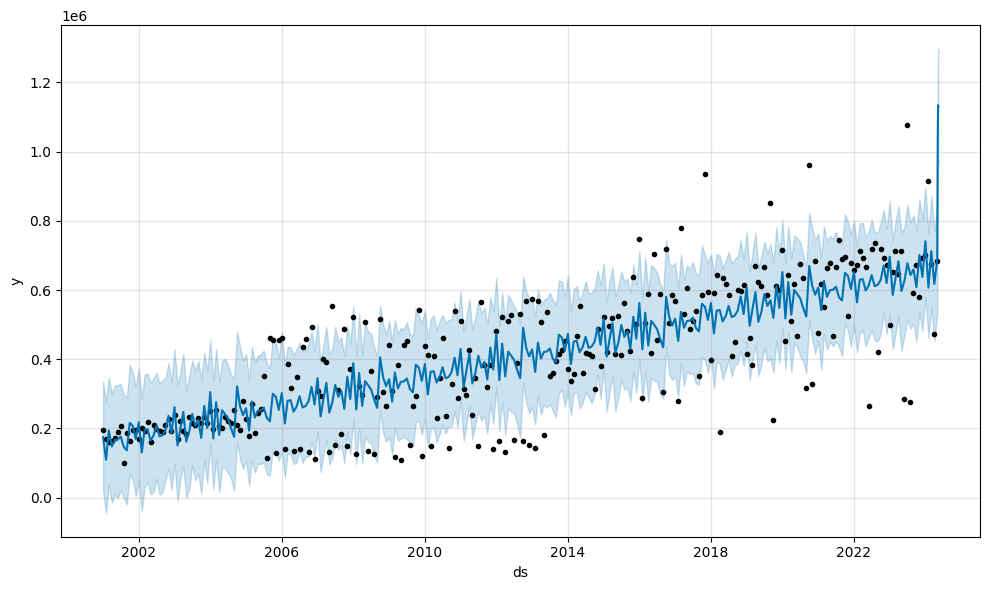

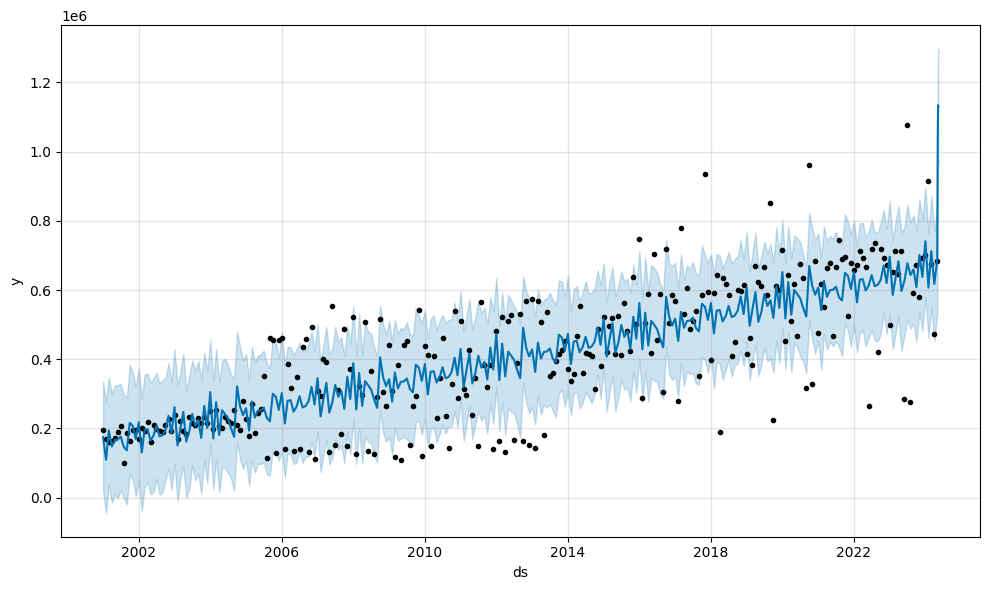

In [43]:
# Prepare data for Prophet
prophet_df = imports.reset_index().rename(columns={'Fecha': 'ds', 'GasLicuado': 'y'})
prophet_df = prophet_df[['ds', 'y']]
prophet_df.head()

# Initialize and fit the Prophet model
prophet_model = Prophet()
prophet_model.fit(prophet_df)

# Make future dataframe and forecast
future = prophet_model.make_future_dataframe(periods=10)
forecast = prophet_model.predict(future)

# Plot the forecast
prophet_model.plot(forecast)


In [47]:
# Calculate RMSE for ARIMA
arima_forecast = model_fit.forecast(steps=10)
arima_rmse = np.sqrt(mean_squared_error(imports['GasLicuado'][-10:], arima_forecast))

# Calculate RMSE for Prophet
prophet_rmse = np.sqrt(mean_squared_error(prophet_df['y'][-10:], forecast['yhat'][-10:]))


print(f'ARIMA RMSE: {arima_rmse}')
print(f'Prophet RMSE: {prophet_rmse}')

ARIMA RMSE: 985735.2330968825
Prophet RMSE: 412528.12372843415


### Regular

22:36:33 - cmdstanpy - INFO - Chain [1] start processing
22:36:33 - cmdstanpy - INFO - Chain [1] done processing


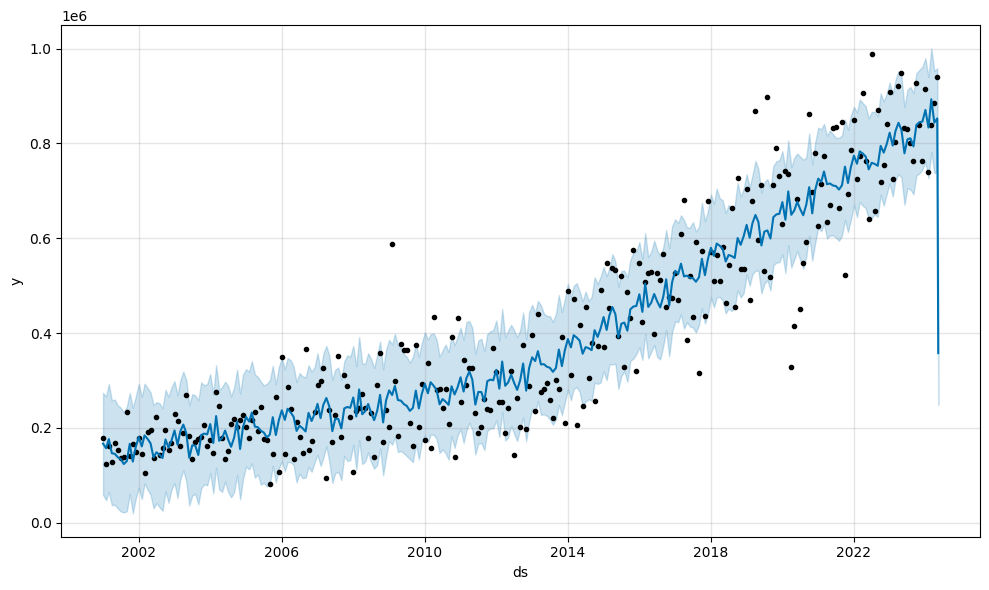

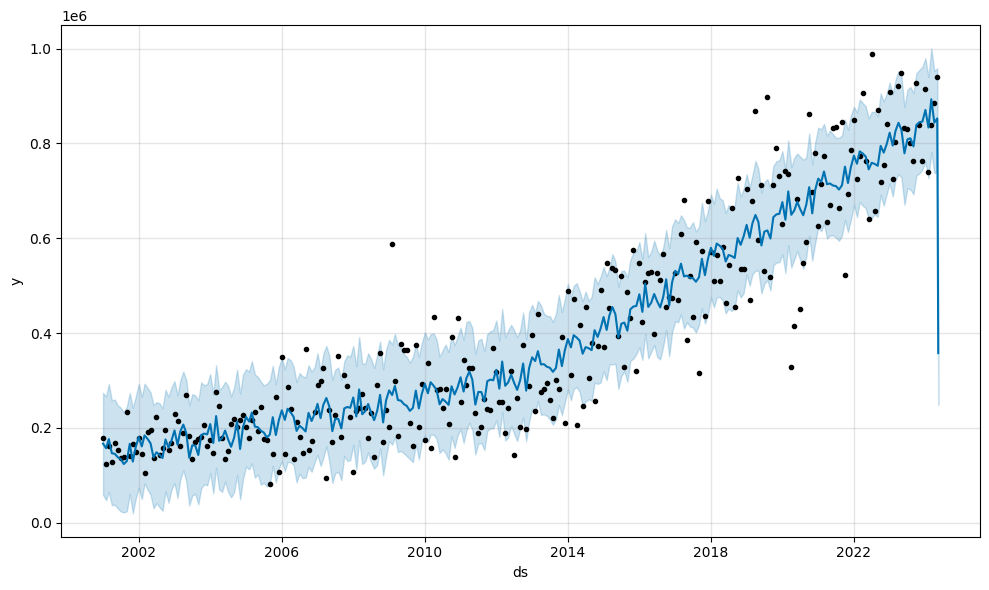

In [48]:
# Prepare data for Prophet
prophet_df = imports.reset_index().rename(columns={'Fecha': 'ds', 'Regular': 'y'})
prophet_df = prophet_df[['ds', 'y']]

# Initialize and fit the Prophet model
prophet_model = Prophet()
prophet_model.fit(prophet_df)

# Make future dataframe and forecast
future = prophet_model.make_future_dataframe(periods=10)
forecast = prophet_model.predict(future)

# Plot the forecast
prophet_model.plot(forecast)


In [53]:
# Calculate RMSE for ARIMA
arima_forecast = model_fit.forecast(steps=10)
arima_rmse = np.sqrt(mean_squared_error(imports['Regular'][-10:], arima_forecast))

# Calculate RMSE for Prophet
prophet_rmse = np.sqrt(mean_squared_error(prophet_df['y'][-10:], forecast['yhat'][-10:]))

print(f'ARIMA RMSE: {arima_rmse}')
print(f'Prophet RMSE: {prophet_rmse}')

ARIMA RMSE: 765849.4729483522
Prophet RMSE: 586270.5318399752


### Superior

22:37:33 - cmdstanpy - INFO - Chain [1] start processing
22:37:33 - cmdstanpy - INFO - Chain [1] done processing


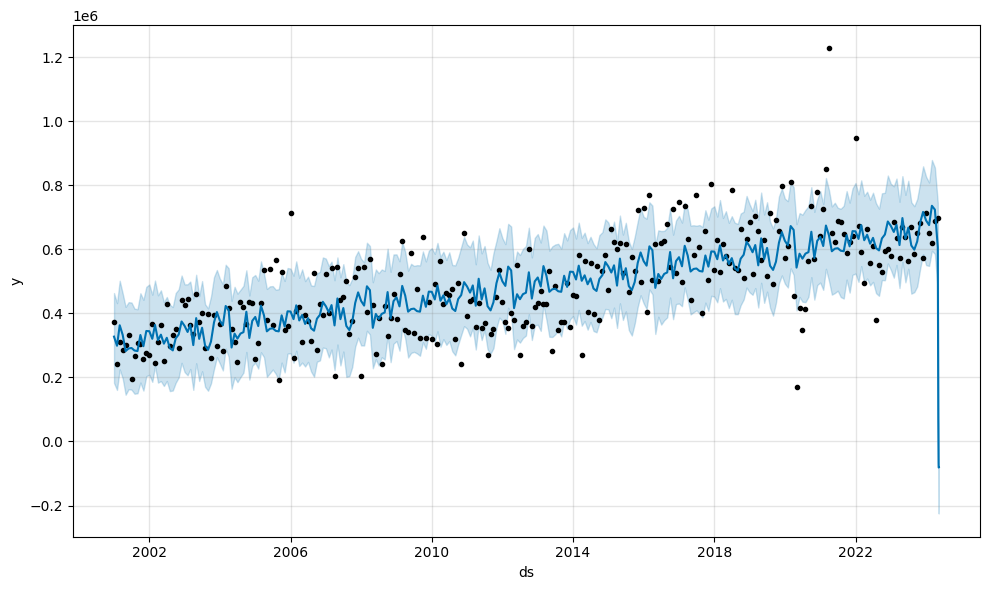

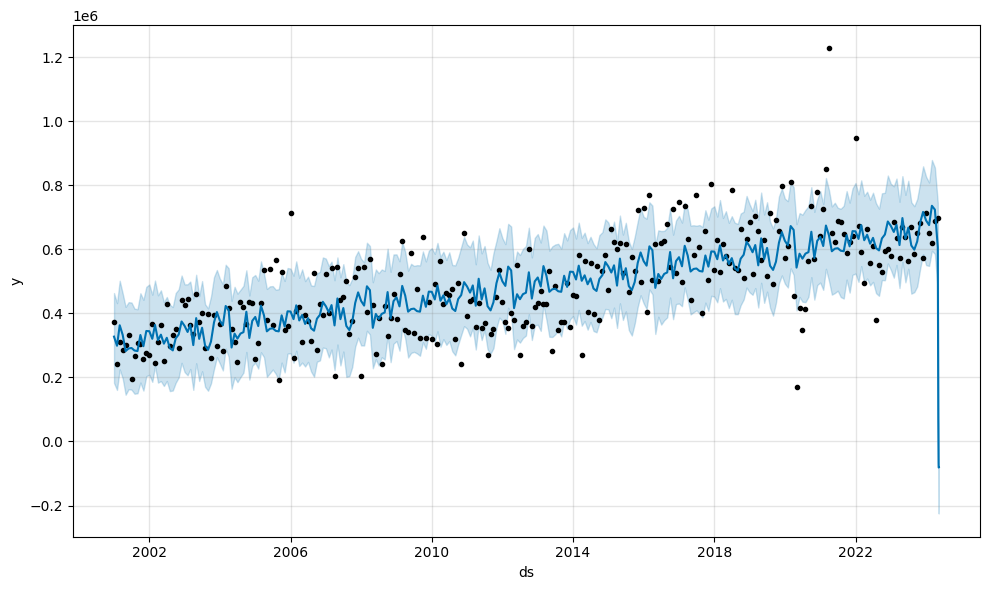

In [50]:
# Prepare data for Prophet
prophet_df = imports.reset_index().rename(columns={'Fecha': 'ds', 'Superior': 'y'})
prophet_df = prophet_df[['ds', 'y']]

# Initialize and fit the Prophet model
prophet_model = Prophet()
prophet_model.fit(prophet_df)

# Make future dataframe and forecast
future = prophet_model.make_future_dataframe(periods=10)
forecast = prophet_model.predict(future)

# Plot the forecast
prophet_model.plot(forecast)


In [52]:
# Calculate RMSE for ARIMA
arima_forecast = model_fit.forecast(steps=10)
arima_rmse = np.sqrt(mean_squared_error(imports['Superior'][-10:], arima_forecast))

# Calculate RMSE for Prophet
prophet_rmse = np.sqrt(mean_squared_error(prophet_df['y'][-10:], forecast['yhat'][-10:]))

print(f'ARIMA RMSE: {arima_rmse}')
print(f'Prophet RMSE: {prophet_rmse}')

ARIMA RMSE: 953056.0373834043
Prophet RMSE: 586270.5318399752


### Diesel

22:39:01 - cmdstanpy - INFO - Chain [1] start processing
22:39:01 - cmdstanpy - INFO - Chain [1] done processing


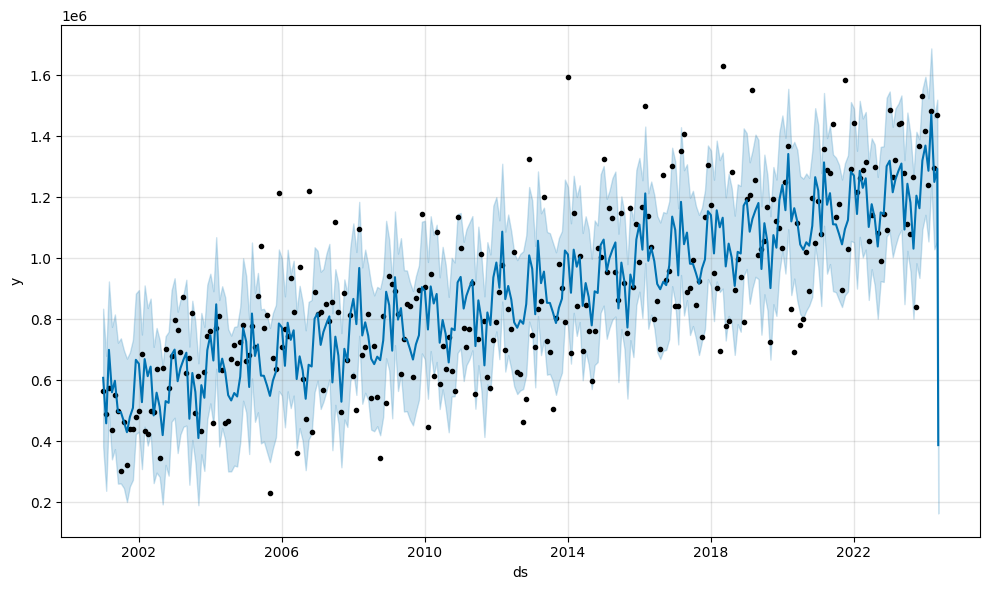

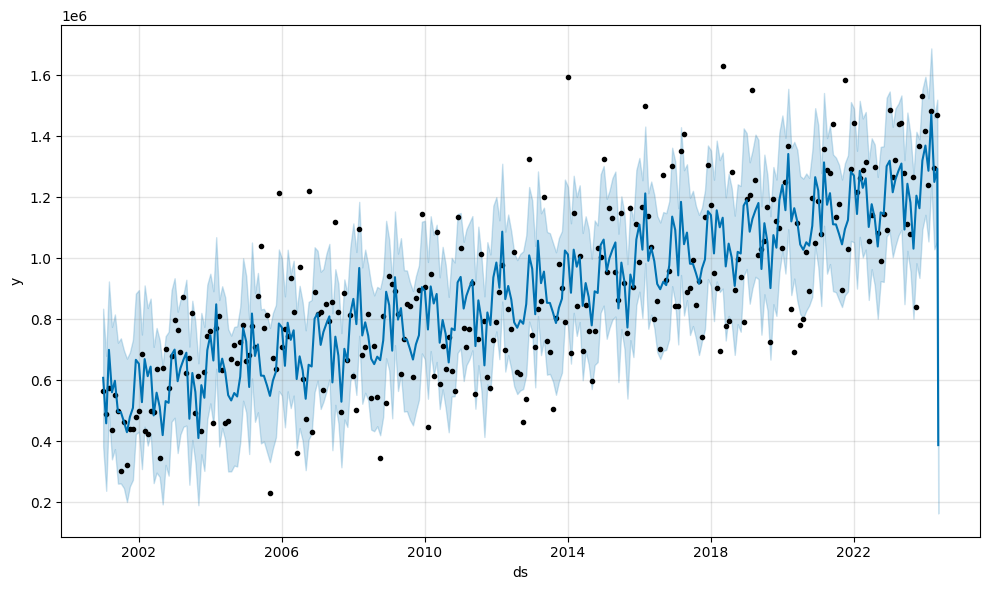

In [54]:
# Prepare data for Prophet
prophet_df = imports.reset_index().rename(columns={'Fecha': 'ds', 'Diesel': 'y'})
prophet_df = prophet_df[['ds', 'y']]

# Initialize and fit the Prophet model
prophet_model = Prophet()
prophet_model.fit(prophet_df)

# Make future dataframe and forecast
future = prophet_model.make_future_dataframe(periods=10)
forecast = prophet_model.predict(future)

# Plot the forecast
prophet_model.plot(forecast)


In [55]:
# Calculate RMSE for ARIMA
arima_forecast = model_fit.forecast(steps=10)
arima_rmse = np.sqrt(mean_squared_error(imports['Diesel'][-10:], arima_forecast))

# Calculate RMSE for Prophet
prophet_rmse = np.sqrt(mean_squared_error(prophet_df['y'][-10:], forecast['yhat'][-10:]))

print(f'ARIMA RMSE: {arima_rmse}')
print(f'Prophet RMSE: {prophet_rmse}')

ARIMA RMSE: 345891.3919918685
Prophet RMSE: 640430.3964974149


Prophet tuvo mejor performance en todas las instancias exeptuando Diesel.